# Root Simulator Module

Import root_simulator module 

In [1]:
from root_simulator import RootSimulator

### Create an instance of the class.

In [2]:
simulate_root = RootSimulator()

#### Create the geometry including the feature distribution within the layer.

In [3]:
# Declaring variables
lateral = [50, -50]  # starts from -50 and extend to 50 on the x-axis
depth = -50  # Depth to be investigated including some boundary.
layer = [-1, -20] # The layer containing the roots.

# The geolocation of points in the tree distribution.
tree_distr = [(-10, -1), (-10, -2.5), (-19, -10), (-22, -17), (-17.7, -11.2), (-12, -7),
           (-13.7, -10), (-16, -12), (-18, -18), (-15, -15), (-10, -12), (-9, -17),
           (-7, -12), (-7, -7), (-5, -12), (-3, -17), (-1, -12), (0, -9), (8, -17),
           (2, -10), (10, -12), (12, -15), (15, -17), (12, -10), (5, -8), (9.3, -6),
           (17, -8), (25, -14), (16, -6), (5, -3), (5, -1)]

In [4]:
simulate_root.create_geom(lateral, depth, layer, tree_distr)

Mesh: Nodes: 132 Cells: 0 Boundaries: 135

(<AxesSubplot:>, None)

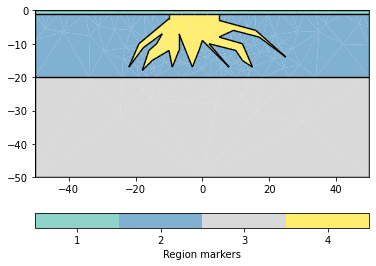

In [5]:
simulate_root.display_geometry()

#### Create the mesh and display the mesh

You can perform several sensitivity test by changing 'wa' to any one of these ['dd', 'wb', 'pp', 'slm', 'pd'] and running the cells again

In [6]:
simulate_root.create_mesh('dd')

Mesh: Nodes: 3053 Cells: 5781 Boundaries: 8833

(<AxesSubplot:>, None)

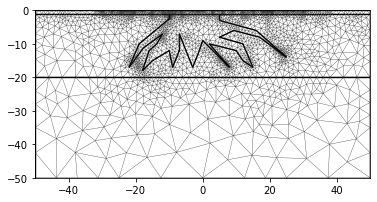

In [7]:
simulate_root.display_mesh()

### Add resistivity to the regions as seen in the geometry.

There are four regional makers representing areas of varying resistivity.

In [8]:
res_tree = [[1, 100], [2, 75], [3, 50], [4, 150]]  # Made the root higher.

# Resistivity typically will decline below the top layer of the soil because
# of soil moisture --- The higher the water content the lower the resistivity.

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7f6d0c18df60>)

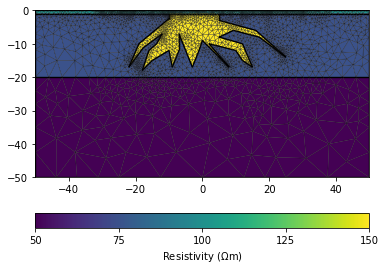

In [9]:
simulate_root.plot_rhomap(res_tree)

#### Run the forward Inversion to see display the Apparent Resistivity.

18/04/22 - 17:04:43 - pyGIMLi - INFO - Calculate geometric factors.


ModellingBase::setMesh() copying new mesh ... Found datafile: 21 electrodes
Found: 21 free-electrodes
rMin = 1.5, rMax = 120
NGauLeg + NGauLag for inverse Fouriertransformation: 11 + 4
Found non-Neumann domain
0.16 s
FOP updating mesh dependencies ... 0 s
Obtaining geometric factors (analytical)
Calculating response for model: min = 50 max = 150
relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.010000430909750916 : 0.01112299104639737
Allocating memory for primary potential...... 0.027

No primary potential for secondary field calculation. Calculating analytically...
Factorize (Cholmod) matrix ... 0.023
Factorize (Cholmod) matrix ... 0.016
Factorize (Cholmod) matrix ... 0.015
Factorize (Cholmod) matrix ... 0.015
Factorize (Cholmod) matrix ... 0.015
Factorize (Cholmod) matrix ... 0.018
Factorize (Cholmod) matrix ... 0.015
Factorize (Cholmod) matrix ... 0.015
Factorize (Cholmod) matrix ... 0.014
Factorize

18/04/22 - 17:04:44 - pyGIMLi - INFO - Filtered rhoa (min/max) 56.725351656227204 158.76875658553487


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7f6d0e38eec0>)

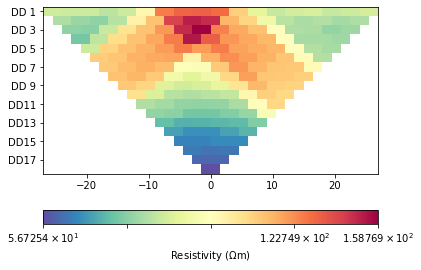

In [10]:
simulate_root.forward_model(res_tree)

#### Perform the Inversion to Output the True Resistivity

18/04/22 - 17:04:48 - pyGIMLi - INFO - Found 2 regions.
18/04/22 - 17:04:48 - pyGIMLi - INFO - Region with smallest marker (1) set to background
18/04/22 - 17:04:48 - Core - WARNING - Region Nr: 1  is background and should not get a model transformation.
18/04/22 - 17:04:48 - Core - WARNING - Region Nr: 1  is background and should not get a model control.
18/04/22 - 17:04:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/04/22 - 17:04:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/04/22 - 17:04:48 - pyGIMLi - INFO - Use median(data values)=93.39325180905615
18/04/22 - 17:04:48 - pyGIMLi - INFO - Created startmodel from forward operator: 311 [93.39325180905615,...,93.39325180905615]
18/04/22 - 17:04:48 - pyGIMLi - INFO - Starting inversion.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  0

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  1

Statistics:

  Input vertices: 49
  Input segments: 50
  Input holes: 0

  Mesh vertices: 265
  Mesh triangles: 460
  Mesh edges: 724
  Mesh exterior boundary edges: 68
  Mesh interior boundary edges: 16
  Mesh subsegments (constrained edges): 84

min/max(dweight) = 89.9039/99.9957
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f6d0e3fa9d0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f6d0e3f9a30>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x7f6d0e3faa70>
min/max (data): 56.73/15

18/04/22 - 17:04:49 - pyGIMLi - INFO - Found 2 regions.
18/04/22 - 17:04:49 - pyGIMLi - INFO - Region with smallest marker (1) set to background
18/04/22 - 17:04:49 - Core - WARNING - Region Nr: 1  is background and should not get a model transformation.
18/04/22 - 17:04:49 - Core - WARNING - Region Nr: 1  is background and should not get a model control.
18/04/22 - 17:04:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/04/22 - 17:04:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/04/22 - 17:04:49 - pyGIMLi - INFO - Use median(data values)=93.39325180905615
18/04/22 - 17:04:49 - pyGIMLi - INFO - Created startmodel from forward operator: 160 [93.39325180905615,...,93.39325180905615]
18/04/22 - 17:04:49 - pyGIMLi - INFO - Starting inversion.


Found datafile: 21 electrodes
Found: 21 node-electrodes
Found non-Neumann domain
 updateDataDependency:: cleaning primpot
Reset region parameter
RegionManager copying mesh ...0.002 s 
create NeighborInfos ... 0 s 
analysing mesh ... 2 regions.
creating para domain ... 0.001 s
creating para domain ... 0.002 s
ModellingBase::setMesh() copying new mesh ... Found datafile: 21 electrodes
Found: 21 free-electrodes
Found non-Neumann domain
0.011 s
FOP updating mesh dependencies ... 0 s
ModellingBase::setMesh() copying new mesh ... 0.009 s
FOP updating mesh dependencies ... 0 s
min/max(dweight) = 89.9039/99.9957
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f6d0e3fa9d0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f6d0e3f9a30>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x7f6d0e3faa70>
min/max (data): 56.73/159
min/max (error): 1%/1.11%
min/max (start model): 93.39/93.39
----------------------------------------------------------------------

Response: min = -4.89836 max = 158.144 mean = 88.3265
Reciprocity rms(modelReciprocity) 28.4225%, max: 92.9548%
tau = 0. Trying parabolic line search with step length 0.3Calculating response for model: min = 38.2689 max = 203.899
Using existing primary potentials.
Factorize (Cholmod) matrix ... 0.008
Factorize (Cholmod) matrix ... 0.006
Factorize (Cholmod) matrix ... 0.006
Factorize (Cholmod) matrix ... 0.006
Factorize (Cholmod) matrix ... 0.006
Factorize (Cholmod) matrix ... 0.007
Factorize (Cholmod) matrix ... 0.007
Factorize (Cholmod) matrix ... 0.007
Factorize (Cholmod) matrix ... 0.006
Factorize (Cholmod) matrix ... 0.006
Factorize (Cholmod) matrix ... 0.006
Factorize (Cholmod) matrix ... 0.005
Factorize (Cholmod) matrix ... 0.006
Factorize (Cholmod) matrix ... 0.006
Factorize (Cholmod) matrix ... 0.007
Forward: time: 0.131s
Response: min = 26.5438 max = 154.557 mean = 93.3988
Reciprocity rms(modelReciprocity) 12.5006%, max: 48.693%
 ==> tau = 0.022075
 tau < 0.03 ==> tau = 0.03
4

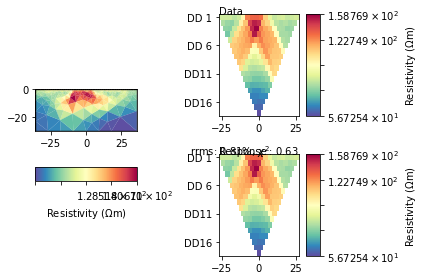

In [11]:
simulate_root.inversion2d()

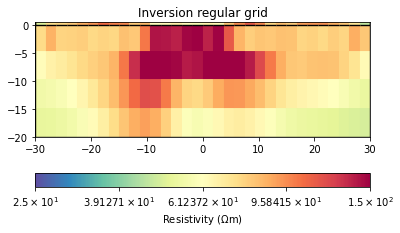

In [12]:
simulate_root.display_inverted_img()

In [13]:
simulate_root.animate_simulation()

Starting Animation......


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>